In [1]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np
import matplotlib.pyplot as plt

LOG.propagate = False

timestamps_ms = []
distances = []
setpoint_distances = []
yaws = []
setpoint_yaws = []
left_controls = []
right_controls = []
left_pwms = []
right_pwms = []

In [2]:
def parse_str2data(ss):
    if ss.count('|') < 3:
        # view as normal message
        print(ss)
        return
    # parse to recorded data
    idx, data = ss.split(':')
    timestamp, distance, setpoint_distance, yaw, setpoint_yaw, left_ctrl, right_ctrl, left_pwm, right_pwm \
        = data.split('|')
    if int(timestamp) == 0 and int(distance) == 0 and int(yaw) == 0:
        return
    timestamps_ms.append(int(timestamp))
    distances.append(int(distance))
    setpoint_distances.append(int(setpoint_distance))
    yaws.append(int(yaw))
    setpoint_yaws.append(int(setpoint_yaw))
    left_controls.append(int(left_ctrl))
    right_controls.append(int(right_ctrl))
    left_pwms.append(int(left_pwm))
    right_pwms.append(int(right_pwm))
    
    # print(f"time: {timestamp}  distance: {distance}  control: {ctrl}  left_pwm: {left_pwm}  right_pwm: {right_pwm}")

def notification_handler(uuid, byte_array):
    data_str = ble.bytearray_to_string(byte_array)
    parse_str2data(data_str)

In [3]:
def plot_graph():
    # 转换时间戳为秒（如果需要）
    timestamps_s = [t / 1000.0 for t in timestamps_ms]
    
    # 创建一个图形窗口和三个轴对象（子图）
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6, 7))  # 3个子图，垂直堆叠
    
    # 在第一个子图上绘制 Setpoints
    ax1.plot(timestamps_s, setpoint_yaws, label='Setpoints', color='red')
    ax1.set_title('Setpoints Over Time')
    ax1.set_ylabel('Setpoints')
    ax1.legend()
    
    # 在第二个子图上绘制 Yaws
    ax2.plot(timestamps_s, yaws, label='Yaws', color='blue')
    ax2.set_title('Yaws Over Time')
    ax2.set_ylabel('Yaws')
    ax2.legend()
    
    # 在第三个子图上绘制 Controls
    ax3.plot(timestamps_s, right_controls, label='Controls', color='green')
    ax3.set_title('Right Controls Over Time')
    ax3.set_ylabel('Right Controls')
    ax3.set_xlabel('Time')  # 只在最下面的子图上设置横轴标签
    ax3.legend()
    
    # 调整子图之间的间距
    plt.tight_layout()
    
    # 显示图形
    plt.show()

In [23]:
# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

ble.start_notify(ble.uuid['RX_STRING'], notification_handler)

2024-04-12 01:35:22,381 | INFO     |: Looking for Artemis Nano Peripheral Device: C0:89:F0:6B:06:4B
2024-04-12 01:35:25,337 | INFO     |: Connected to C0:89:F0:6B:06:4B


In [24]:
ble.send_command(CMD.PING, "")

PONG


In [25]:
ble.send_command(CMD.START_AUTO, "")
timestamps_ms = []
distances = []
setpoint_distances = []
yaws = []
setpoint_yaws = []
left_controls = []
right_controls = []
left_pwms = []
right_pwms = []

Succeed: start auto running


In [26]:
ble.send_command(CMD.SET_GOAL_YAW, "30")

In [27]:
ble.send_command(CMD.SET_GOAL_YAW, "-30")

In [28]:
ble.send_command(CMD.SET_GOAL_YAW, "0")

In [29]:
ble.send_command(CMD.STOP, "")

Succeed: brake and stop auto running


In [30]:
ble.send_command(CMD.GET_HISTORY_DATA, "")

Size of records array: 842


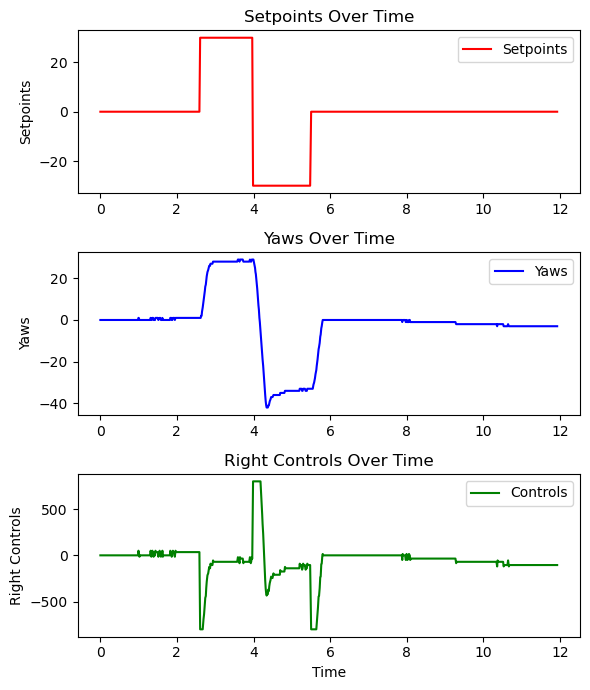

In [37]:
plot_graph()

In [10]:
# ble.send_command(CMD.SET_TWO_CTRL, "125|-220")
# s = ble.receive_string(ble.uuid['RX_STRING'])

In [21]:
# ble.send_command(CMD.GET_CURR_DATA, "")
# s = ble.receive_string(ble.uuid['RX_STRING'])

In [9]:
# ble.send_command(CMD.GET_CURR_DATA, "")
# s = ble.receive_string(ble.uuid['RX_STRING'])

In [10]:
# ble.send_command(CMD.SET_TWO_CTRL, "125|-220")
# s = ble.receive_string(ble.uuid['RX_STRING'])

In [11]:
# ble.send_command(CMD.STOP, "")
# s = ble.receive_string(ble.uuid['RX_STRING'])